In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

In [ ]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [ ]:
loss_fn(y_train[:1], predictions).numpy()

2.5388193

In [ ]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2983 - accuracy: 0.9114
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1460 - accuracy: 0.9563
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1092 - accuracy: 0.9670
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0893 - accuracy: 0.9722
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0764 - accuracy: 0.9762


In [ ]:
model.evaluate(x_test, y_test, verbose=2)

313/313 - 0s - loss: 0.0773 - accuracy: 0.9770


[0.07731291651725769, 0.9769999980926514]

In [ ]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

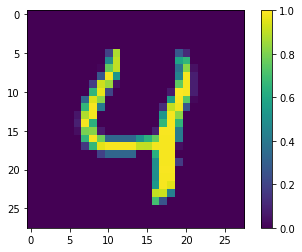

In [ ]:
plt.figure()
plt.imshow(x_test[4])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
probability_model.predict(x_test[4:5])

array([[3.1720051e-06, 5.9100480e-09, 2.4573096e-06, 3.1265671e-08,
        9.9927300e-01, 8.5847333e-08, 1.8329030e-06, 1.4018071e-04,
        6.0313107e-07, 5.7851820e-04]], dtype=float32)

In [ ]:
x = probability_model.predict(x_test[4:5])

In [ ]:
np.argmax(x)


4